In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cmath

### Grid Details

In [2]:
n = 10                                             # Size of grid n*n
grid = np.random.randint(2, size=(n, n))      
print(grid)

indices =  np.random.randint(0, high=n, size=2)    # Ant's Location
x,y = indices
print(x,y)
print(grid[x,y])

direction = complex(0,-1)                          # Ant's Direction, Default South
print(direction)

[[0 1 1 1 1 1 1 0 0 0]
 [1 1 1 0 0 1 0 1 0 1]
 [0 1 1 1 0 0 0 0 0 1]
 [1 1 0 1 1 1 1 0 1 1]
 [0 1 1 1 0 0 1 1 1 1]
 [0 1 0 1 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 1 1]
 [1 1 0 0 0 0 0 1 0 0]
 [1 0 0 0 1 0 1 0 1 0]
 [1 1 0 0 1 0 1 0 0 1]]
2 9
1
-1j


### Direction's value

Complex Numbers make it so easy!

Let **direction** = 

*  $j\quad\rightarrow\quad$North
*  $1\quad\rightarrow\quad$East 
* $-j\quad\rightarrow\quad$South
* $-1\quad\rightarrow\quad$West 

Turning right divides **direction** by j

Turning left multiplies **direction** by j

Then we can update the **indices** by adding **direction**

Also the ant is essentially living on a **toroid**! (top and bottom row are joined and leftmost and rightmost columns are joined)

In [3]:
def update():
    global n, grid, x, y, direction
    if (grid[x,y] == 0):
        grid[x,y] = 1
        direction /= 1j
        x = int((x + direction.real) % n)
        y = int((y + direction.imag) % n)
    elif (grid[x,y] == 1):
        grid[x,y] = 0
        direction *= 1j
        x = int((x + direction.real) % n)
        y = int((y + direction.imag) % n)

In [4]:
def animate(i):
    global grid
    update()    
    im.set_array(grid)
    return im

<IPython.core.display.Javascript object>


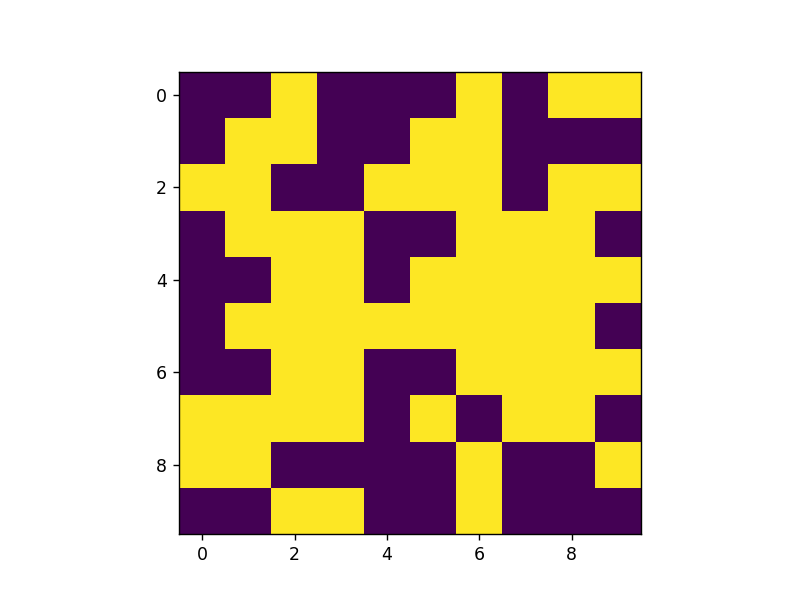

In [5]:
figure, axes = plt.subplots()
im = plt.imshow(grid, animated = True)
#figure.set_size_inches(7, 5)                 # To Change figure size

animation = FuncAnimation(figure, animate, frames = 200, interval = 200, blit = True)
plt.show()
#animation.save('lA.mp4', writer = 'ffmpeg', fps = 15, dpi = 250)  # For Saving animation